# Start

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# đọc file dữ liệu và thể hiện thành dạng cột
colnames = ['Numbers of input', 'Execution time']

data_to_train = pd.read_csv("http://cs.uit.edu.vn/data2.txt", names = colnames, header = None)

data_test1 = pd.read_csv("http://cs.uit.edu.vn/data3.txt", names = colnames, header = None)
data_test2 = pd.read_csv("http://cs.uit.edu.vn/data4.txt", names = colnames, header = None)

data_to_train.head()

,Numbers of input,Execution time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


In [3]:
#phân chia dữ liệu trên tập train
x_train = np.array(data_to_train['Numbers of input']).reshape(-1,1)
y_train = np.array(data_to_train['Execution time']) 
#phân chia dữ liệu trên tập test
x_test1 = np.array(data_test1['Numbers of input']).reshape(-1, 1)
y_test1 = np.array(data_test1['Execution time'])

x_test2 = np.array(data_test2['Numbers of input']).reshape(-1, 1)
y_test2 = np.array(data_test2['Execution time'])

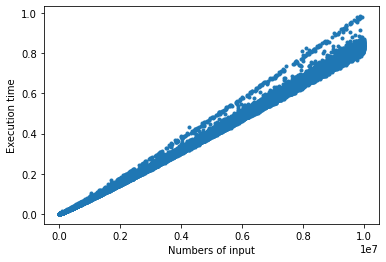

In [4]:
# hiển thị dữ liệu file data2.txt
plt.plot(x_train, y_train, '.')
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.show()

## Train model


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


#tạo model
lr = LinearRegression().fit(x_train, y_train)


In [6]:
#tính toán độ lỗi của model trên tập dữ liệu train
print("mean squared error data2.txt: ",mean_squared_error(y_train, lr.predict(x_train)))
# tính toán hệ số ước lượng coefficient of determination: 1 is perfect prediction
print("Coefficient of determination data2.txt: ",r2_score(y_train, lr.predict(x_train)))

mean squared error data2.txt:  0.00014337728721748832
Coefficient of determination data2.txt:  0.9975924993345858


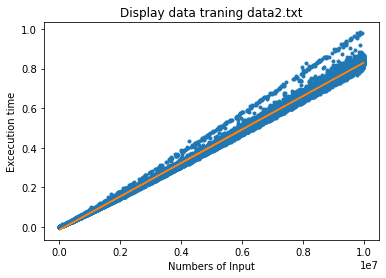

In [7]:
# hiển thị kết quả của việc train
plt.plot(x_train, y_train, ".")
plt.plot(x_train, lr.predict(x_train))
plt.title("Display data traning data2.txt")
plt.xlabel('Numbers of Input')
plt.ylabel('Excecution time')
plt.show()

## Test model

In [8]:
#tính toán độ lỗi của model trên tập dữ liệu test
print("mean squared error data3.txt: ",mean_squared_error(y_test1, lr.predict(x_test1)))
# tính toán hệ số ước lượng coefficient of determination: 1 is perfect prediction
print("Coefficient of determination data3.txt: ",r2_score(y_test1, lr.predict(x_test1)))

mean squared error data3.txt:  0.020664949397550484
Coefficient of determination data3.txt:  0.9284132208349405


In [9]:
print("mean squared error data4.txt: ",mean_squared_error(y_test2, lr.predict(x_test2)))
print("Coefficient of determination data4.txt: ",r2_score(y_test2, lr.predict(x_test2)))

mean squared error data4.txt:  0.22348476817427124
Coefficient of determination data4.txt:  0.3156839605365529


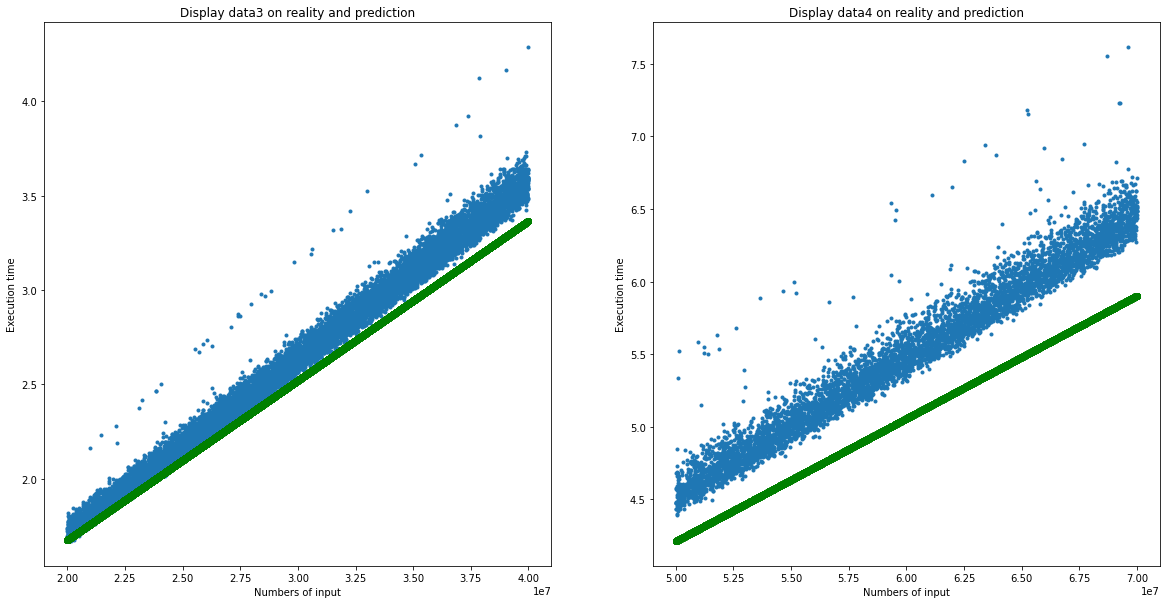

In [10]:
# hiển thị kết quả của việc test file data3.txt data4.txt

fig, (axs1, axs2) = plt.subplots(1,2, figsize = (20,10))
axs1.plot(x_test1, y_test1, '.' )
axs1.plot(x_test1, lr.predict(x_test1), 'go' )


axs1.set_title("Display data3 on reality and prediction")
axs1.set(xlabel='Numbers of input', ylabel='Execution time')


axs2.plot(x_test2, y_test2, '.' )
axs2.plot(x_test2, lr.predict(x_test2), 'go' )


axs2.set_title("Display data4 on reality and prediction")
axs2.set(xlabel='Numbers of input', ylabel='Execution time')

plt.show()

### Đánh giá:
- Số lượng input (Numbers of Input) càng lớn thì thời gian chạy (Excecution time) càng lâu.
- Mean Squared Error (MSE) có giá trị khá nhỏ do giá trị y (Excecution Time) ban đầu đều khá nhỏ.
- Dữ liệu tập train khá sát nhau, còn dữ liệu tập test chứa nhiều dữ liệu nhiễu phân tán ra xa thưa thớt. Vì vậy cho nên khi Test sẽ không xử lí được những dữ liệu ở xa.
- Cách khắc phục là nên tăng tính đa dạng, bao quát nhiều trường hợp khách quan hơn cho tập dữ liệu train hơn nữa.

## Cải thiện mô hình

### Xóa các dữ liệu nhỏ trong tập train

In [11]:
data_to_train = pd.read_csv("http://cs.uit.edu.vn/data2.txt", names = colnames, header = None)

In [12]:
data_to_train

,Numbers of input,Execution time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977
...,...,...
71110,4472112,0.350379
71111,5471895,0.429955
71112,9837364,0.801394
71113,9466593,0.776407


In [13]:
# Loại bỏ các data từ đầu đến không lớn hơn giá trị c của tập data_to_train để train model
for c in range(0,9000000,1000000):
    X_train = []
    y_train = []
    print('----------------------------------------------------------------')
    print('min of Number of input:',c)
    for i in range(71115):
        if data_to_train['Numbers of input'][i] > c:
            X_train.append(data_to_train['Numbers of input'][i])
            y_train.append(data_to_train['Execution time'][i])
    X_train = np.array(X_train)
    X_train = X_train.reshape(-1,1)
    model = LinearRegression().fit(X_train, y_train)
    print("mean squared error data2.txt: ",mean_squared_error(y_train, model.predict(X_train)))
    print("mean squared error data3.txt: ",mean_squared_error(y_test1, model.predict(x_test1)))
    print("mean squared error data4.txt: ",mean_squared_error(y_test2, model.predict(x_test2)))


----------------------------------------------------------------
min of Number of input: 0
mean squared error data2.txt:  0.00014337728721748832
mean squared error data3.txt:  0.020664949397550484
mean squared error data4.txt:  0.22348476817427124
----------------------------------------------------------------
min of Number of input: 1000000
mean squared error data2.txt:  0.00014424151694161392
mean squared error data3.txt:  0.016255736026086834
mean squared error data4.txt:  0.1879233725102579
----------------------------------------------------------------
min of Number of input: 2000000
mean squared error data2.txt:  0.0001550649004971264
mean squared error data3.txt:  0.013496606025831475
mean squared error data4.txt:  0.16426842557975815
----------------------------------------------------------------
min of Number of input: 3000000
mean squared error data2.txt:  0.00017075426013978332
mean squared error data3.txt:  0.011453788544834583
mean squared error data4.txt:  0.1457236036

#### nhận thấy khi các dữ liệu của tâp train có giá trị nhỏ nhất càng lớn thì giá trị MSE càng lớn với tập train và càng nhỏ với tập test

### Áp dụng linear regression nhiều biến

In [14]:
import math

In [15]:
data_to_train = pd.read_csv("http://cs.uit.edu.vn/data2.txt", names = colnames, header = None)
x_train = np.array(data_to_train['Numbers of input']).reshape(-1,1)
y_train = np.array(data_to_train['Execution time']) 

### với công thức y1 = 𝞱_1 * x + 𝞱_2 * x^2 + 𝞱_3 * log(x) + 𝞱_4 * xlog(x) + 𝞱_5 * sqrt(x) + 𝞱_0 

In [16]:
X_train = []
for i in range(71115):
    x = data_to_train['Numbers of input'][i]
    X_train.append([x, x*x, math.log10(x), x * math.log10(x),math.sqrt(x)]) # tạo dữ liệu từ 1 cột thành nhiều cột
X_train = np.array(X_train)
model = LinearRegression().fit(X_train,y_train)
X_test1 = []
for i in range(10590):
    x = data_test1['Numbers of input'][i]
    X_test1.append([x, x*x, math.log10(x), x * math.log10(x),math.sqrt(x)])
X_test = np.array(X_test1)
X_test2 = []
for i in range(6023):
    x = data_test2['Numbers of input'][i]
    X_test2.append([x, x*x, math.log10(x), x * math.log10(x),math.sqrt(x)])
X_test2 = np.array(X_test2)
print("mean squared error data3.txt: ",mean_squared_error(y_test1,model.predict(X_test1)))
print("mean squared error data4.txt: ",mean_squared_error(y_test2, model.predict(X_test2)))



mean squared error data3.txt:  0.004882468341636734
mean squared error data4.txt:  0.0211867782255019


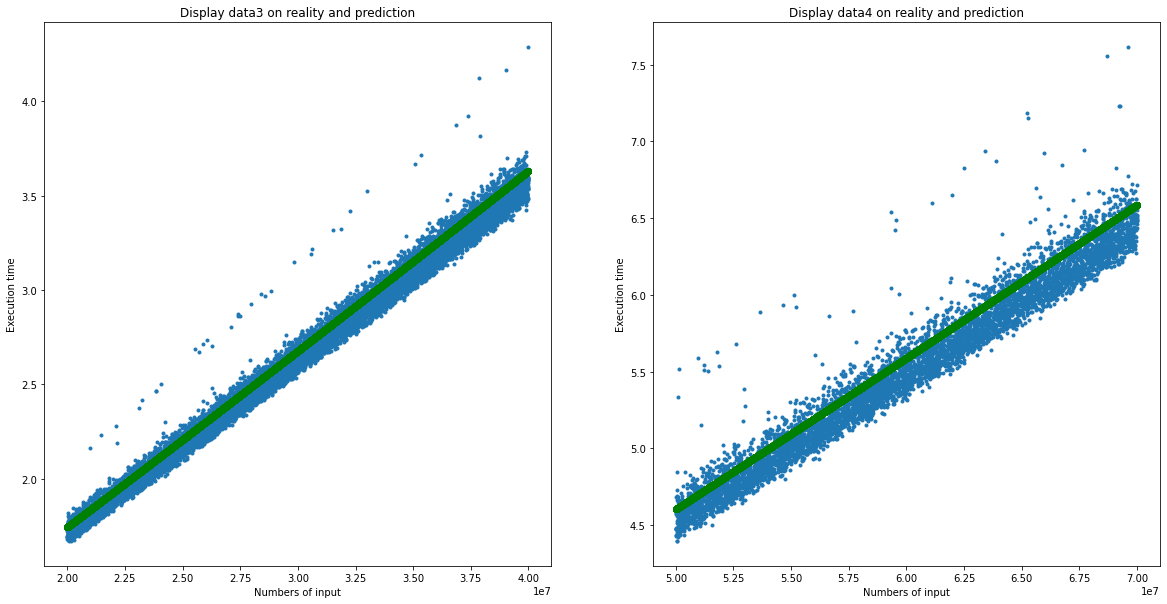

In [17]:
fig, (axs1, axs2) = plt.subplots(1,2, figsize = (20,10))
axs1.plot(x_test1, y_test1, '.' )
axs1.plot(x_test1, model.predict(X_test1), 'go' )


axs1.set_title("Display data3 on reality and prediction")
axs1.set(xlabel='Numbers of input', ylabel='Execution time')


axs2.plot(x_test2, y_test2, '.' )
axs2.plot(x_test2, model.predict(X_test2), 'go' )


axs2.set_title("Display data4 on reality and prediction")
axs2.set(xlabel='Numbers of input', ylabel='Execution time')

plt.show()

### với công thức 2 y2 = 𝞱_1 * x + 𝞱_2 * x^2 + 𝞱_3 * log(x) + 𝞱_4 * sqrt(x) + 𝞱_5 * x*sqrt(x) + 𝞱_0

In [18]:
X_train = []
for i in range(71115):
    x = data_to_train['Numbers of input'][i]
    X_train.append([x, x*x, math.log10(x), math.sqrt(x), x * math.sqrt(x)])
X_train = np.array(X_train)
model2 = LinearRegression().fit(X_train,y_train)
X_test1 = []
for i in range(10590):
    x = data_test1['Numbers of input'][i]
    X_test1.append([x, x*x, math.log10(x), math.sqrt(x), x * math.sqrt(x)])
X_test = np.array(X_test1)
X_test2 = []
for i in range(6023):
    x = data_test2['Numbers of input'][i]
    X_test2.append([x, x*x, math.log10(x), math.sqrt(x), x * math.sqrt(x)])
X_test2 = np.array(X_test2)
print("mean squared error data3.txt: ",mean_squared_error(y_test1,model2.predict(X_test1)))
print("mean squared error data4.txt: ",mean_squared_error(y_test2, model2.predict(X_test2)))

mean squared error data3.txt:  0.0039865702260694835
mean squared error data4.txt:  0.015847764704778534


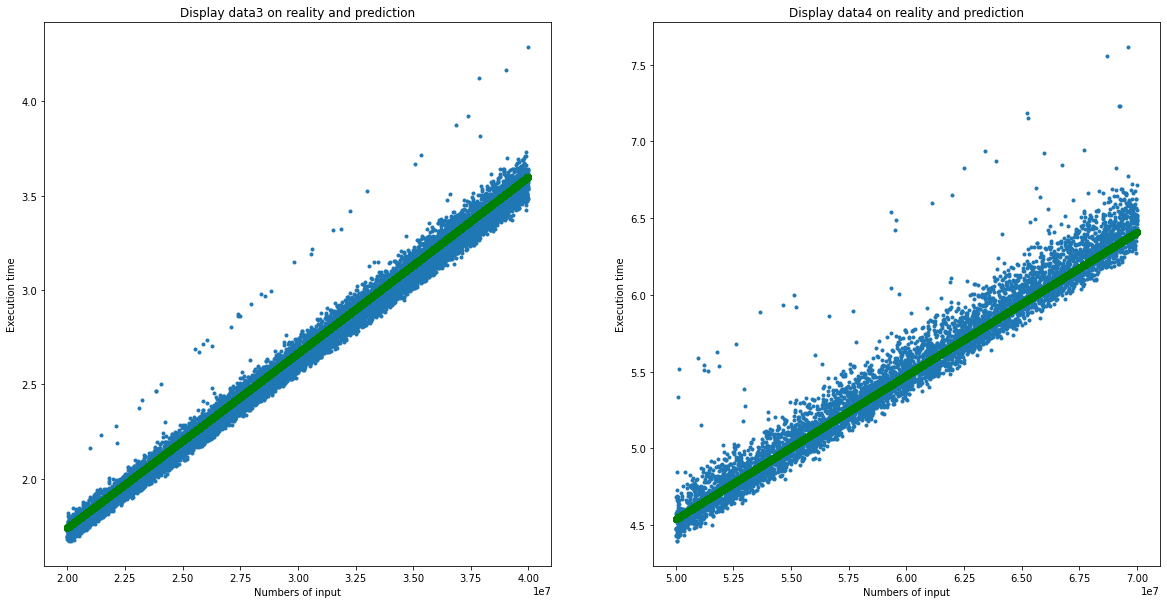

In [19]:
fig, (axs1, axs2) = plt.subplots(1,2, figsize = (20,10))
axs1.plot(x_test1, y_test1, '.' )
axs1.plot(x_test1, model2.predict(X_test1), 'go' )


axs1.set_title("Display data3 on reality and prediction")
axs1.set(xlabel='Numbers of input', ylabel='Execution time')


axs2.plot(x_test2, y_test2, '.' )
axs2.plot(x_test2, model2.predict(X_test2), 'go' )


axs2.set_title("Display data4 on reality and prediction")
axs2.set(xlabel='Numbers of input', ylabel='Execution time')

plt.show()


#### Khi sử dụng regression nhiều biến thì độ đánh giá MSE giảm lên đáng kể.
#### công thức 2 có MSE nhỏ hơn công thức 1